In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root_Path = "/Users/jonasserry/Google Drive/GDFT-Net"
root_Path = "/content/drive/My Drive/GDFT-Net"
import sys
sys.path.append(root_Path)

from Core import GDFT_Data
from Core import GDFT_Net
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
print(tf.__version__)

Data Version: 1.61
Net Version: 1.72
2.3.0


In [ ]:
from importlib import reload  
reload(GDFT_Data)
reload(GDFT_Net)

Data Version: 1.61
Net Version: 1.63


<module 'Core.GDFT_Net' from '/Users/jonasserry/Google Drive/GDFT-Net/Core/GDFT_Net.py'>

In [4]:
x=512
Net=GDFT_Net.load_GDFT_Net("Saved_Models/Saved_Nets/SET({0}x64)Network.pkl".format(x))
Net.load_models()

FileNotFoundError: ignored

In [ ]:
Net.errors

AttributeError: 'GDFT_Net' object has no attribute 'errors'

SNR: 0.10 RMSE: 8.67 STD: 1.26
SNR: 0.20 RMSE: 8.54 STD: 1.26
SNR: 0.30 RMSE: 8.58 STD: 1.28
SNR: 0.40 RMSE: 8.44 STD: 1.26
SNR: 0.50 RMSE: 7.84 STD: 1.22
SNR: 0.60 RMSE: 7.24 STD: 1.36
SNR: 0.70 RMSE: 5.97 STD: 1.35
SNR: 0.80 RMSE: 4.87 STD: 1.25
SNR: 0.90 RMSE: 3.36 STD: 0.89
SNR: 1.00 RMSE: 2.60 STD: 0.60
SNR: 1.10 RMSE: 2.06 STD: 0.33
SNR: 1.20 RMSE: 1.88 STD: 0.27
SNR: 1.30 RMSE: 1.69 STD: 0.17
SNR: 1.40 RMSE: 1.66 STD: 0.20
SNR: 1.50 RMSE: 1.59 STD: 0.16
SNR: 1.60 RMSE: 1.64 STD: 0.28
SNR: 1.70 RMSE: 1.62 STD: 0.49
SNR: 1.80 RMSE: 1.57 STD: 0.16
SNR: 1.90 RMSE: 1.55 STD: 0.15
SNR: 2.00 RMSE: 1.56 STD: 0.21
Saved as: /content/drive/My Drive/GDFT-Net/Saved_Models/Saved_Nets/SET(512x64)Network
Remember to reload models


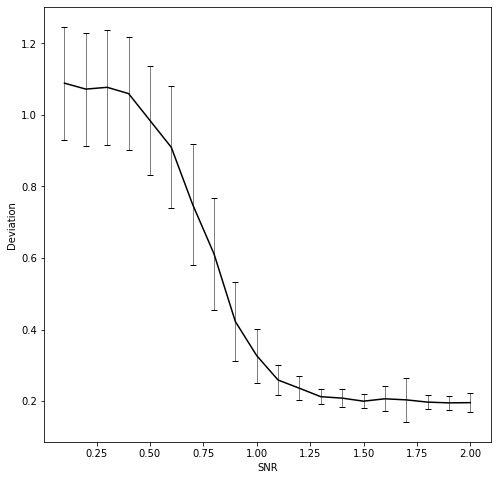

In [ ]:
DS = GDFT_Data.load_Data_Set("Saved_Data/Test_Data/TestDATA(500): {0}.pkl".format(x))
DS.SNRs= list(DS.SNRs)
Net.run_RMSE_Testing(DS=DS)
Net.plot_RMSE_Data(corrected=True)
Net.save_Data_to_file("Saved_Data/Results/Set({0}x64).npy".format(x))
Net.save_Net("Saved_Models/Saved_Nets/SET({0}x64)Network".format(x))

Text(0, 0.5, 'RMSE ($\\lambda_0$)')

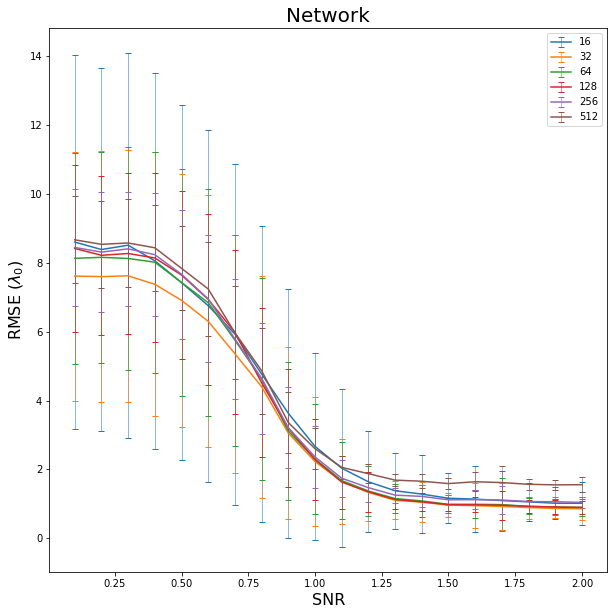

In [ ]:
xs = [16,32,64,128,256,512]
MEANS, STDS,CORRS = [],[],[]


plt.figure(figsize=(10,10))

for x in xs:
    Net=GDFT_Net.load_GDFT_Net("Saved_Models/Saved_Nets/SET({0}x64)Network.pkl".format(x))
    Net.load_Data_from_file("Saved_Data/Results/Set({0}x64).npy".format(x))
    means, SNRs, stds, corr = Net.get_RMSE_Data()
    MEANS.append(means)
    STDS.append(stds)
    CORRS.append(corr)
    plt.errorbar(SNRs,means,yerr=stds,capsize=3,elinewidth=0.5,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Network",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)

In [ ]:
print(Net.standard_dev_delays)

None


In [ ]:
x=64
Net=GDFT_Net.load_GDFT_Net("/content/drive/My Drive/GDFT-Net/Saved_Models/Saved_Nets/SET({0}x64)Network.pkl".format(x))
Net.load_models()

Network RMSE: 2.9 Wavelengths
Variation: 4.0 Wavelengths


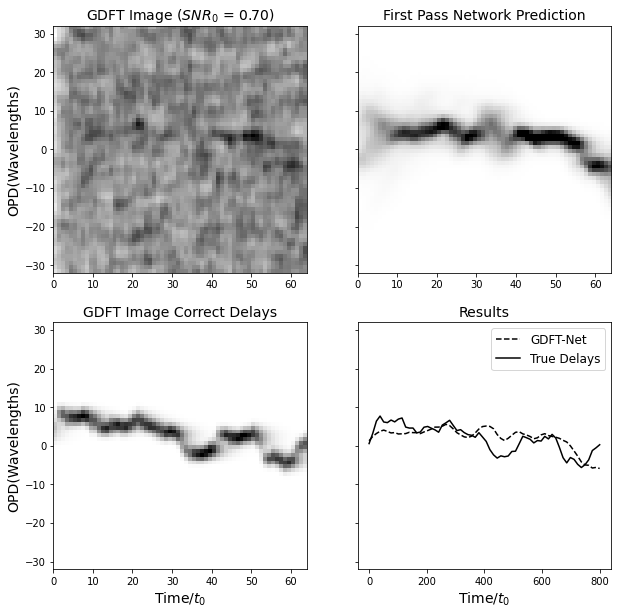

In [ ]:
Net.plot_random_Example(SNR=0.7)